FIAP - Tecnólogo de Inteligência Artificial


# Machine Learning & Modelling - Checkpoint #2 e Checkpoint #3 

Faça _individualmente_ a lista abaixo para praticar análise descritiva, gráficos e regressão linear. Utilize os conceitos vistos em sala, os notebooks disponíveis e consulte documentações de Python na Internet. Em caso de dúvidas, contate o Prof. Michel. 

**Entrega**: 19/maio/2023, via Teams - IMPORTANTE: renomeie o notebook incluindo seu nome! 



## Dataset

O dataset mapeia características de pessoas cruzando com o valor pago pelo seu seguro de saúde nos EUA. Os dados são compostos pelas seguintes variáveis: 

- `age` : idade do indivíduo 
- `sex` : sexo do indivíduo 
- `bmi` : "Body mass index", o IMC (índice de massa corporal)
- `children` : número de filhos
- `smoker` : fumante ou não?
- `region` : região de residência da pessoa
- `charges` : tarifa paga pela pessoa

Os dados podem ser lidos diretamente a partir desta URL: https://tinyurl.com/42rvaw4p


## Atividades 

A partir da leitura do dataset, realize as seguintes tarefas: 

### Gerais (CK #2)

1. Faça uma análise descritiva geral dos dados, para se familirizar com o dataset 

### Gráficos (CK #2)

Lembrem-se! Todo gráfico precisa ter um título, o nome do Eixo X e do Eixo Y! Estas alterações nos gráficos são **obrigatórias**. Outras alterações de layout são bem-vindas, e podem gerar nota extra ;D

2. Faça um histograma com as idades das pessoas
3. Faça uma gráfico com a distribuição das pessoas por sexo
4. Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto 
5. Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"
6. Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro _hue_ ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões? 


### Filtros de dataframes (CK #3)

7. Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc. 
8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes


### Regressão linear (CK #3)

9. Padronize as features do dataset 
10. Execute uma regressão linear simples usando todas as features padronizadas (exercício 9) (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Carregar o conjunto de dados
url = "https://tinyurl.com/42rvaw4p"
df = pd.read_csv(url)

# Análise descritiva geral dos dados
print(df.head())
print(df.info())
print(df.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

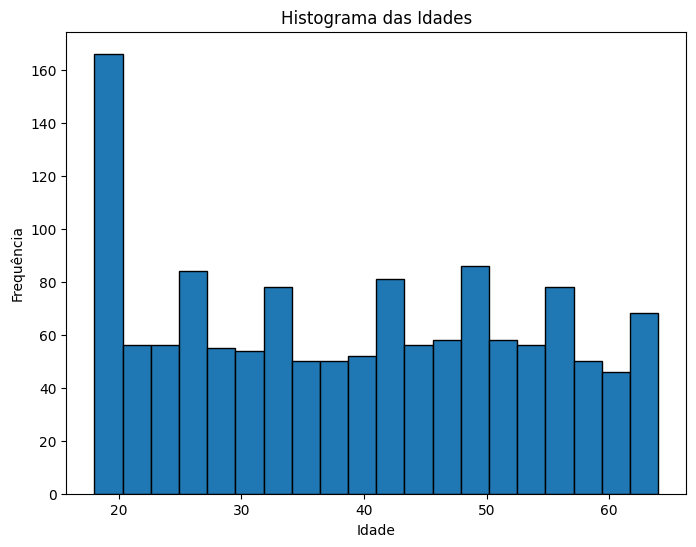

In [2]:
# Histograma com as idades das pessoas
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Histograma das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


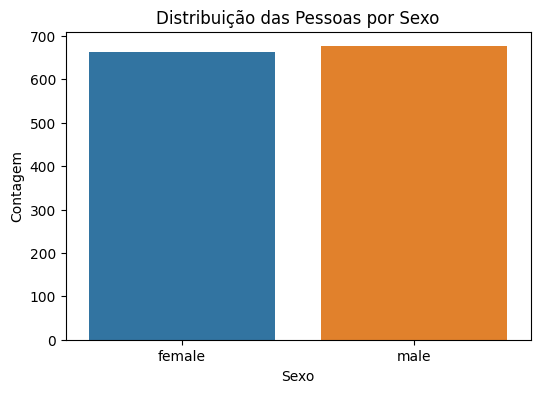

In [3]:
#Gráfico com a distribuição das pessoas por sexo
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex')
plt.title('Distribuição das Pessoas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()


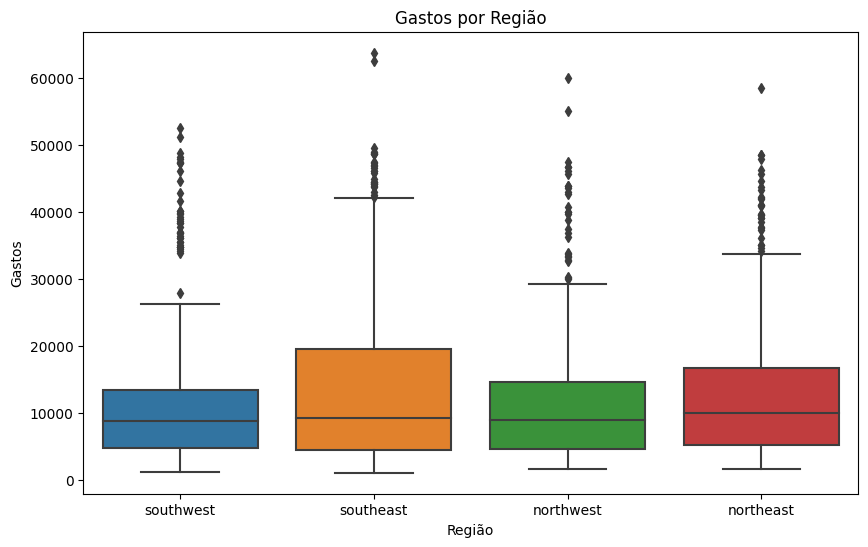

In [4]:
#Boxplot de gastos por região
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges')
plt.title('Gastos por Região')
plt.xlabel('Região')
plt.ylabel('Gastos')
plt.show()


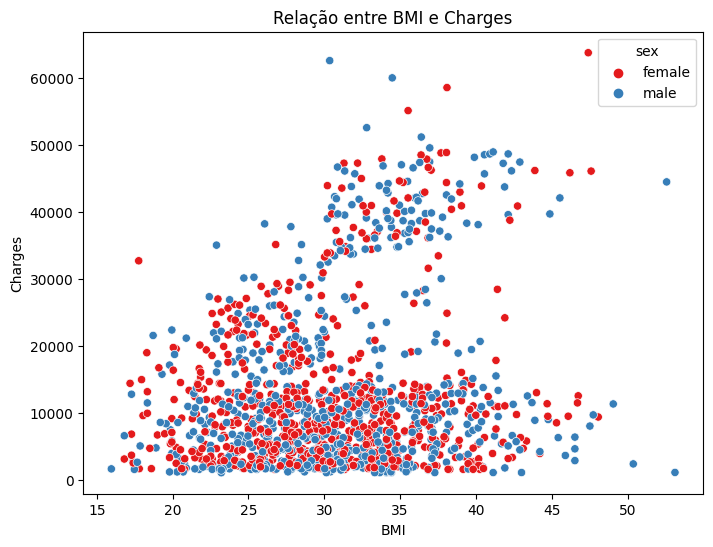

In [5]:
#Gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex', palette='Set1')
plt.title('Relação entre BMI e Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


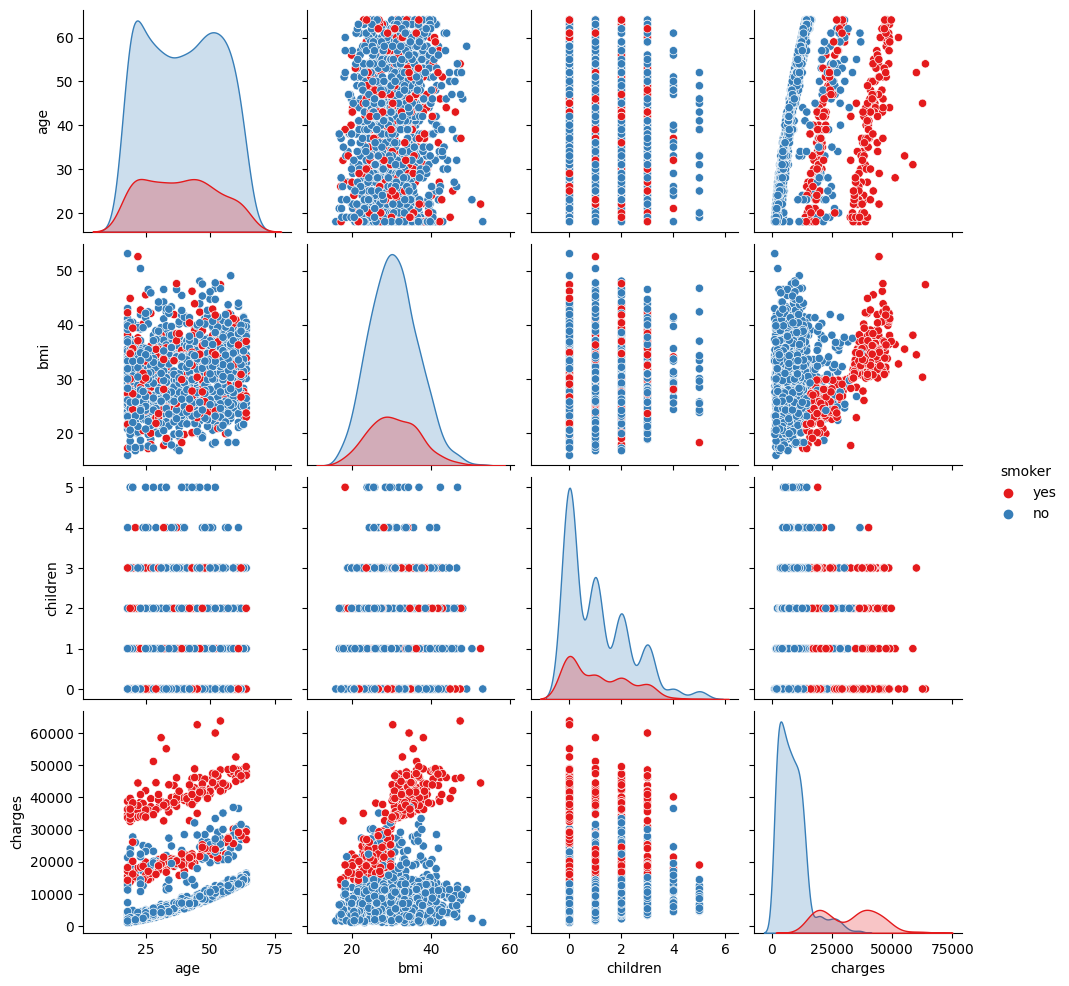

In [6]:
#Pairplot (da biblioteca seaborn) de todas as variáveis
sns.pairplot(data=df, hue='smoker', palette='Set1')
plt.show()


In [16]:
#Dataframe
mean_charges = df['charges'].mean()
df_high_charges = df[df['charges'] > mean_charges]
print(df_high_charges.describe())


              age         bmi    children       charges
count  420.000000  420.000000  420.000000    420.000000
mean    42.464286   31.039250    1.138095  27751.288177
std     15.244582    5.980884    1.202613  11583.651568
min     18.000000   17.195000    0.000000  13352.099800
25%     29.000000   26.695000    0.000000  17923.109290
50%     43.000000   30.887500    1.000000  24516.677630
75%     57.000000   35.507500    2.000000  37712.051525
max     64.000000   52.580000    5.000000  63770.428010


In [18]:
# Selecionar pessoas que pagam acima do valor médio da tarifa
df_above_mean = df[df['charges'] > df['charges'].mean()]

# Descrever o perfil dessas pessoas
profile = {
    'Quantidade de Filhos': df_above_mean['children'].mean(),
    'Idade Média': df_above_mean['age'].mean(),
    'Sexo': df_above_mean['sex'].value_counts().idxmax()
}

# Imprimir o perfil dessas pessoas
for key, value in profile.items():
    print(f"{key}: {value}")


Quantidade de Filhos: 1.138095238095238
Idade Média: 42.464285714285715
Sexo: male


In [8]:
#Fumantes abaixo de 30 anos
count_young_smokers = df[(df['age'] < 30) & (df['smoker'] == 'yes')].shape[0]
print(f"O número de pessoas abaixo dos 30 anos e fumantes é: {count_young_smokers}")


O número de pessoas abaixo dos 30 anos e fumantes é: 86


In [15]:
#Padronização
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include='number').columns[:-1]  # Selecionar apenas as colunas numéricas, excluindo a coluna alvo

scaled_features = scaler.fit_transform(df[numeric_columns])
df_scaled = pd.DataFrame(scaled_features, columns=numeric_columns)
df_scaled['charges'] = df['charges']  # Manter a coluna "charges" original no novo DataFrame

